# Анализ базы данных для книжного сервиса

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Наша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Наша первая задача как аналитиков — проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

## Содержание<a name="Cодержание"></a>

1. [Знакомство с данными](#1.-Знакомство-с-данными)
2. [Анализ данных](#2.-Анализ-данных)
	1. [Cколько книг вышло после 1 января 2000 года](#Cколько-книг-вышло-после-1-января-2000-года)
	2. [Количество обзоров и средняя оценка для каждой книги](#Количество-обзоров-и-средняя-оценка-для-каждой-книги)
	3. [Издательство, которое выпустило наибольшее число книг толще 50 страниц](#Издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц)
	4. [Автор с самой высокой средней оценкой книг](#Автор-с-самой-высокой-средней-оценкой-книг)
	5. [Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок](#Cреднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок)

## 0. Импорт библиотек

In [1]:
import pandas as pd
from sqlalchemy import create_engine

Также установим параметры соедиениния и создадим коннектор.

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-final-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

## 1. Знакомство с данными<a name="1.-Знакомство-с-данными"></a>

Напишем функцию, с помощью которой будем знакомиться с таблицами.

In [3]:
def show_data_introduction(table_name):
    '''
    Эта функция принимает на вход название таблицы и выводит ее первые 5 строк и общую информацю о ней.
    
    table_name -- название таблицы из базы данных.
    '''
    table_query = '''
        SELECT *
        FROM
            {}
    '''.format(table_name)
    
    table = pd.io.sql.read_sql(table_query, con=engine)
    
    print('Первые строки таблицы ' + '\033[1m' + table_name + '\033[0m')
    display(table.head(5))
    print()
    print('Общие сведения о таблице ' + '\033[1m' + table_name + '\033[0m')
    print()
    table.info()

Начнем знакомоство с таблицами с `books`.

In [4]:
show_data_introduction('books')

Первые строки таблицы books


book_id  author_id                                              title  \
0        1        546                                       'Salem's Lot   
1        2        465                 1 000 Places to See Before You Die   
2        3        407  13 Little Blue Envelopes (Little Blue Envelope...   
3        4         82  1491: New Revelations of the Americas Before C...   
4        5        125                                               1776   

   num_pages publication_date  publisher_id  
0        594       2005-11-01            93  
1        992       2003-05-22           336  
2        322       2010-12-21           135  
3        541       2006-10-10           309  
4        386       2006-07-04           268


Общие сведения о таблице books

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
book_id             1000 non-null int64
author_id           1000 non-null int64
title               1000 non-null object
num_pages           1000 non-null int64
publication_date    1000 non-null object
publisher_id        1000 non-null int64
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


Каждый объект в таблице — это информация об одной книге. А именно:
- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

Всего у нас есть информация о 1000 книг.

Теперь познакомися с авторами в таблице `authors`.

In [5]:
show_data_introduction('authors')

Первые строки таблицы authors


author_id                          author
0          1                      A.S. Byatt
1          2  Aesop/Laura Harris/Laura Gibbs
2          3                 Agatha Christie
3          4                   Alan Brennert
4          5        Alan Moore/David   Lloyd


Общие сведения о таблице authors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
author_id    636 non-null int64
author       636 non-null object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


Таблица хранит данные об авторах:
- `author_id` — идентификатор автора;
- `author` — имя автора.

Всего в таблице 636 авторов.

На очереди издательства из `publishers`.

In [6]:
show_data_introduction('publishers')

Первые строки таблицы publishers


publisher_id                          publisher
0             1                                Ace
1             2                           Ace Book
2             3                          Ace Books
3             4                      Ace Hardcover
4             5  Addison Wesley Publishing Company


Общие сведения о таблице publishers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
publisher_id    340 non-null int64
publisher       340 non-null object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


Строки в таблице содеражат следующую информацию об издательствах:
- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства.

Всего у нас 340 издательств.

Остались пользовательские оценки и обзоры. Оценки хранятся в `ratings`. Посмотрим на них.

In [7]:
show_data_introduction('ratings')

Первые строки таблицы ratings


rating_id  book_id       username  rating
0          1        1     ryanfranco       4
1          2        1  grantpatricia       2
2          3        1   brandtandrea       5
3          4        2       lorichen       3
4          5        2    mariokeller       2


Общие сведения о таблице ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
rating_id    6456 non-null int64
book_id      6456 non-null int64
username     6456 non-null object
rating       6456 non-null int64
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


Об оценках мы знаем:
- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

Всего пользователи сделали 6456 оценок.

Обзоры пользователей хранятся в таблице `reviews`. Изучим их.

In [8]:
show_data_introduction('reviews')

Первые строки таблицы reviews


review_id  book_id       username  \
0          1        1   brandtandrea   
1          2        1     ryanfranco   
2          3        2       lorichen   
3          4        3  johnsonamanda   
4          5        3    scotttamara   

                                                text  
0  Mention society tell send professor analysis. ...  
1  Foot glass pretty audience hit themselves. Amo...  
2  Listen treat keep worry. Miss husband tax but ...  
3  Finally month interesting blue could nature cu...  
4  Nation purpose heavy give wait song will. List...


Общие сведения о таблице reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
review_id    2793 non-null int64
book_id      2793 non-null int64
username     2793 non-null object
text         2793 non-null object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


У обзоров есть следующие атрибуты:
- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

Всего пользователи написали 2793 обзоров.

С таблицами познакомились. Осталось понять, как они связаны. В этом поможет ER-диаграмма.

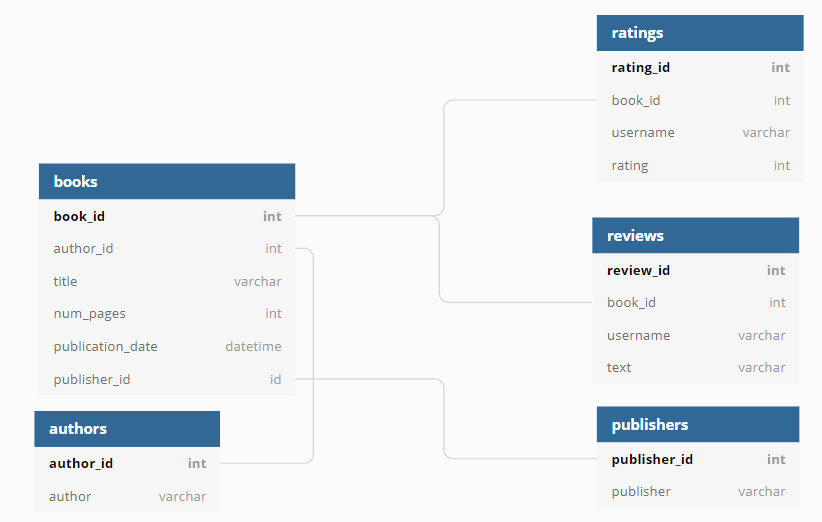

[К содержанию](#Содержание)

## 2. Анализ данных<a name="2.-Анализ-данных"></a>

### Cколько книг вышло после 1 января 2000 года<a name="Cколько-книг-вышло-после-1-января-2000-года"></a>

Чтобы найти, сколько книг вышло за определенный период, достаточно сделать запрос к таблице `books` с агрегирующей функций `COUNT` и конструкцией `WHERE`.

In [9]:
n_books_since_2000_query = '''
    SELECT
        COUNT(*) AS n_books_since_2000
    FROM
        books
    WHERE
        publication_date >= '2000-01-01'
'''

pd.io.sql.read_sql(n_books_since_2000_query, con=engine)

n_books_since_2000
0                 821

У нас данные за 20 лет, поэтому в среднем в год выходит по 41 книге.

### Количество обзоров и средняя оценка для каждой книги<a name="Количество-обзоров-и-средняя-оценка-для-каждой-книги"></a>

Чтобы рассчитать количество обзоров и среднюю оценку для каждой книги, запрос будет сложнее. Придется рассчитать каждый параметр внутри соответсвующих таблиц, а потом присоединить результат по идентификатору книги.

Мы не можем просто присоединить таблицы `reviews` и `ratings` к `books` по индентификаторам книг, потому что тогда данные из таблицы, которую мы присоединим второй, задвоятся.

Для наглядность отсортируем результат по количеству обзоров.

In [10]:
reviews_and_avg_rating_per_book_query = '''
    WITH n_reviews_per_book AS
    (
        SELECT
            book_id,
            COUNT(DISTINCT review_id) AS n_reviews
        FROM
            reviews
        GROUP BY
            book_id
    ),
    avg_rating_per_book AS
    (
        SELECT
            book_id,
            AVG(rating) AS avg_rating
        FROM
            ratings
        GROUP BY
            book_id
    )
    
    SELECT
        title,
        n_reviews,
        avg_rating
    FROM
        books
        LEFT JOIN n_reviews_per_book ON books.book_id = n_reviews_per_book.book_id
        LEFT JOIN avg_rating_per_book ON books.book_id = avg_rating_per_book.book_id
    ORDER BY
        n_reviews DESC NULLS LAST
'''

pd.io.sql.read_sql(reviews_and_avg_rating_per_book_query, con=engine)

title  n_reviews  avg_rating
0                              Twilight (Twilight  #1)        7.0    3.662500
1                                     The Glass Castle        6.0    4.206897
2    The Curious Incident of the Dog in the Night-Time        6.0    4.081081
3                                             The Road        6.0    3.772727
4                            The Giver (The Giver  #1)        6.0    3.750000
..                                                 ...        ...         ...
995    Anne Rice's The Vampire Lestat: A Graphic Novel        NaN    3.666667
996                            The Natural Way to Draw        NaN    3.000000
997                          Essential Tales and Poems        NaN    4.000000
998   The Cat in the Hat and Other Dr. Seuss Favorites        NaN    5.000000
999                               Leonardo's Notebooks        NaN    4.000000

[1000 rows x 3 columns]

### Издательство, которое выпустило наибольшее число книг толще 50 страниц<a name="Издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц"></a>

Чтобы найти самое «производительное» издательство, присоединим таблицу `publishers` к `books` по `book_id`. Затем зададим ограничение по числу страниц и сгруппируем данные по издательствам.

In [11]:
most_productive_publisher_query = '''
    SELECT
        publishers.publisher,
        COUNT(DISTINCT books.book_id) as books_published
    FROM
        books
        LEFT JOIN publishers ON books.publisher_id = publishers.publisher_id
    WHERE
        books.num_pages > 50
    GROUP BY
        publishers.publisher
    ORDER BY
        books_published DESC
    LIMIT 1    
'''

pd.io.sql.read_sql(most_productive_publisher_query, con=engine)

publisher  books_published
0  Penguin Books               42

В среднем издательство Penguin Bookыs выпускает по две книги в год.

### Автор с самой высокой средней оценкой книг<a name="Автор-с-самой-высокой-средней-оценкой-книг"></a>

В этом задании заказчик попросил учитывать только книги с 50 и более оценками. Поэтому сначала найдем их в таблице `ratings`. Дальше есть два варианта:
1. мы считаем среднюю оценку всех книг по средней оценке каждой книги (складываем средние оценки книг и делим на количество книг);
2. мы считаем среднюю оценку как сумму всех оценок и делим на все количество книг, написанных автором. 

Первый вариант кажется более логичным, но я всякий случай сделал оба.

В первом варианте при поиске книг с 50 и более оценками мы сразу считаем среднюю оценку каждой такой книги. Затем по `book_id` присоединяем к получившейся таблице `books`. Благодаря этому соединению мы можем сделать новое, а именно присоединить `authors` по `author_id`, чтобы на выходе иметь имя автора, а не его идентификатор.

In [12]:
author_with_highest_average_rating_query_1 = '''
    WITH most_rated_books AS
    (
        SELECT
            book_id,
            COUNT(DISTINCT rating_id) AS n_rates,
            AVG(rating) AS avg_rating
        FROM    
            ratings
        GROUP BY
            book_id
        HAVING
            COUNT(rating_id) >= 50
    )

    SELECT
        author,
        AVG(avg_rating) AS avg_rating
    FROM    
        most_rated_books
        LEFT JOIN books ON books.book_id = most_rated_books.book_id
        LEFT JOIN authors ON authors.author_id = books.author_id
    GROUP BY
        author
    ORDER BY
        avg_rating DESC
    LIMIT 1    
        
'''

pd.io.sql.read_sql(author_with_highest_average_rating_query_1, con=engine)

author  avg_rating
0  J.K. Rowling/Mary GrandPré    4.283844

Второй вариант — после того, как мы нашли книги с 50 и более оценками, мы получаем все их оценки. Затем, как в первом случае, получаем имена авторов. В конце группируем все строки (а значит и оценки) по авторам и считаем среднюю оценку.

In [13]:
author_with_highest_average_rating_query_2 = '''
    WITH most_rated_books AS
    (
        SELECT
            book_id,
            COUNT(DISTINCT rating_id) AS n_rates
        FROM    
            ratings
        GROUP BY
            book_id
        HAVING
            COUNT(rating_id) >= 50
    )

    SELECT
        author,
        AVG(rating) as avg_rating
    FROM    
        most_rated_books
        LEFT JOIN ratings ON ratings.book_id = most_rated_books.book_id
        LEFT JOIN books ON books.book_id = most_rated_books.book_id
        LEFT JOIN authors ON authors.author_id = books.author_id
    GROUP BY
        author
    LIMIT 1    
'''

pd.io.sql.read_sql(author_with_highest_average_rating_query_2, con=engine)

author  avg_rating
0  J.K. Rowling/Mary GrandPré    4.287097

В обоих случаях авторами с самой высокой средней оценкой книг, у которых 50 и более оценок, стали Джулия Роулинг и Мэри Грандпре, создательницы Гарри Поттера. Но средний был в тысячном раздряде различается.

### Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок<a name="Cреднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок"></a>

Здесь придется обернуть подзапрос в подзапрос. Сначала найдем пользователей, которые поставили больше 50 оценок. Получим таблицу с именами пользователей и количеством оставленных отзывов. Затем присоединим к этим пользователям их обзоры и посчитаем, сколько написал каждый. В конце сложим получившиеся числа и разделим на количество пользователей.

In [14]:
avg_reviews_num = '''
    WITH most_active_users_and_n_reviews AS
    (
        WITH most_active_users AS
        (
            SELECT
                username,
                COUNT(DISTINCT rating_id) AS n_rates
            FROM    
                ratings
            GROUP BY
                username
            HAVING
                COUNT(rating_id) > 50
        )

        SELECT
            most_active_users.username,
            COUNT(DISTINCT review_id) AS n_reviews
        FROM
            most_active_users
            LEFT JOIN reviews ON reviews.username = most_active_users.username
        GROUP BY
            most_active_users.username
    )        
    
    SELECT
        AVG(n_reviews)
    FROM
        most_active_users_and_n_reviews
'''

pd.io.sql.read_sql(avg_reviews_num, con=engine)

avg
0  24.333333

24 обзора в среднем написали пользователи, которые оставили больше 50 оценок. Хватило бы на собственнные книги!

[К содержанию](#Содержание)